In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_excel("/content/Flight .xlsx")

In [4]:
data.head()
data.info()
data.value_counts()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person           88 non-null     object 
 1   Item_Identifier  88 non-null     object 
 2   Length           71 non-null     float64
 3   Breadth          88 non-null     float64
 4   PaperQuality     80 non-null     object 
 5   Angle            84 non-null     object 
 6   Foldings         88 non-null     float64
 7   Windspeed        88 non-null     object 
 8   Dominanthand     88 non-null     object 
 9   Distance         88 non-null     float64
dtypes: float64(4), object(6)
memory usage: 7.0+ KB


,Length,Breadth,Foldings,Distance
count,71.000000,88.000000,88.000000,88.000000
mean,26.708451,18.500000,8.136364,6.090909
std,11.920268,1.339068,1.736570,1.974762
min,0.000000,16.000000,5.000000,1.000000
25%,22.500000,17.500000,8.000000,5.000000
50%,28.500000,18.500000,8.000000,6.000000
75%,29.500000,20.000000,10.000000,7.000000
max,98.000000,20.500000,10.000000,11.000000


In [5]:
from sklearn import svm
X = [[0, 0],[2, 2]]
y = [0.5, 2.5]
regre = svm.SVR()
regre.fit(X, y)

regre.predict([[1, 1]])

array([1.5])

In [6]:
data.isnull().sum()

Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

In [7]:
data.Length.fillna(data.Length.median(),inplace = True)
data.Length.isnull().sum()

0

In [8]:
data.PaperQuality.isnull().sum()

8

In [9]:
data.PaperQuality.fillna('others',inplace = True)

In [10]:
data.Angle.fillna('others',inplace = True)

In [11]:
data.Person.isnull().sum()
data.isnull().sum()

Person             0
Item_Identifier    0
Length             0
Breadth            0
PaperQuality       0
Angle              0
Foldings           0
Windspeed          0
Dominanthand       0
Distance           0
dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f550bdf15d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f550bdf9550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f550be01550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f550bdf9fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f550bdf1a90>,
  <matplotlib.lines.Line2D at 0x7f550bdf1fd0>]}

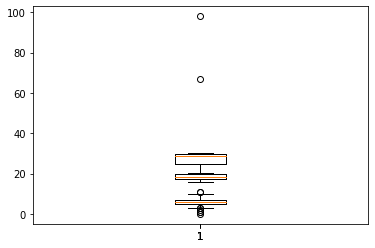

In [12]:
plt.boxplot(data.Breadth)
plt.boxplot(data.Length)
plt.boxplot(data.Distance)
plt.boxplot(data.Breadth)

In [13]:
pd.get_dummies(data.Person)
dummy = pd.get_dummies(data)
dummy


,Length,Breadth,Foldings,Distance,Person_Giri,Person_Kevin,Person_Priya,Person_Shabana,Item_Identifier_AJ,Item_Identifier_Kiruthik,...,PaperQuality_A,PaperQuality_B,PaperQuality_others,Angle_L,Angle_U,Angle_others,Windspeed _Off,Windspeed _On,Dominanthand_L,Dominanthand_R
0,29.0,20.0,8.0,5.0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1,23.0,16.0,8.0,5.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,28.5,18.0,10.0,6.0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
3,27.0,20.0,10.0,4.0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
4,29.5,17.5,5.0,8.0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,29.5,17.5,5.0,7.0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1
84,28.5,18.5,5.0,5.0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
85,30.0,19.0,8.0,4.0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
86,25.0,17.0,8.0,5.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [14]:
x=dummy.drop('Distance',axis=1)
y=dummy.Distance

In [15]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.predict(x_test)
predicted_y = model.predict(x_test)
model.score(x_test,y_test)

-0.7874181966432401

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(dummy)
scaled_data=scaler.transform(dummy)

In [20]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [22]:
pred_y=model.predict(x_test)
pred_y

array([7.0363575 , 6.89333333, 7.3672619 , 7.05775794, 6.19654545,
       7.52766955, 6.29738095, 6.22019841, 6.31021429, 5.74469048,
       7.0194329 , 6.52516667, 7.0363575 , 5.85478968, 6.52516667,
       6.5002619 , 6.30316667, 6.52516667])

In [24]:
print("train score=",model.score(x_train,y_train))

train score= 0.25111449814693976


In [25]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test,pred_y)


In [29]:
modela=GradientBoostingRegressor(random_state=42)
modela.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [30]:
modela1 =modela.score(x_test,y_test)

In [31]:
print(modela1)

-0.09426230100548194


In [32]:
reg = AdaBoostRegressor(n_estimators=100, random_state=42)
reg.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [34]:
ABR=reg.score(x_test,y_test)
print(ABR)

-0.012990405503931823
